In [7]:
import pandas as pd
import numpy as np
from pandas import DataFrame

#read csv file into a pandas DataFrame named seperately
X = pd.read_csv('data/X.csv')
Y = pd.read_csv('data/Y.csv')

#set the outcome result give no more than two digits after decimal point.
pd.set_option("display.precision", 2)
print("Mean value of Device statistics:")
print(X.mean())
print ("-----------------------------------------------------")
print(Y.mean())
print ("--------------------------------------------------------------------------------------")
print ("Maximum value of Device statistics:")
print(X.max())
print ("-----------------------------------------------------")
print(Y.max())
print ("--------------------------------------------------------------------------------------")
print ("Minimum value of Device statistics:")
print(X.min())
print ("-----------------------------------------------------")
print(Y.min())
print ("--------------------------------------------------------------------------------------")
print ("25th percentile value of Device statistics:")
print(X.quantile(0.25))
print ("-----------------------------------------------------")
print(Y.quantile(0.25))
print ("--------------------------------------------------------------------------------------")
print ("90th percentile value of Device statistics:")
print(X.quantile(0.9))
print ("-----------------------------------------------------")
print(Y.quantile(0.9))
print ("--------------------------------------------------------------------------------------")
print ("Standard deviation value of Device statistics:")
print(X.std())
print ("-----------------------------------------------------")
print(Y.std())
print ("--------------------------------------------------------------------------------------")

Mean value of Device statistics:
plist-sz     8.76e+02
totsck       4.85e+02
ldavg-1      7.33e+01
pgfree/s     1.50e+05
proc/s       8.00e+00
all_%%usr    8.62e+01
file-nr      2.58e+03
cswch/s      5.25e+04
%%memused    1.33e+01
runq-sz      6.34e+01
TimeStamp    1.41e+09
dtype: float64
-----------------------------------------------------
Unnamed: 0    1.80e+03
DispFrames    1.89e+01
TimeStamp     1.41e+09
dtype: float64
--------------------------------------------------------------------------------------
Maximum value of Device statistics:
plist-sz     1.41e+03
totsck       7.44e+02
ldavg-1      1.56e+02
pgfree/s     8.65e+05
proc/s       5.80e+01
all_%%usr    9.81e+01
file-nr      2.98e+03
cswch/s      8.47e+04
%%memused    1.76e+01
runq-sz      1.50e+02
TimeStamp    1.41e+09
dtype: float64
-----------------------------------------------------
Unnamed: 0    3.60e+03
DispFrames    3.02e+01
TimeStamp     1.41e+09
dtype: float64
------------------------------------------------------

In [43]:

cpu_mem_smaller_num = X.loc[(X['%%memused'] < 50) & (X['all_%%usr'] < 90)].TimeStamp.count()
print("The number of observations with CPU utilization smaller than 90% and memory utilization smaller than 50% is:",cpu_mem_smaller_num)

cswch_ls_60000 = X[X['cswch/s'] < 60000]
print("The average number of used sockets for observations with less than 60000 context switches per seconds is",np.round(cswch_ls_60000["totsck"].mean(),decimals=2))


The number of observations with CPU utilization smaller than 90% and memory utilization smaller than 50% is: 1114
The average number of used sockets for observations with less than 60000 context switches per seconds is 356.12


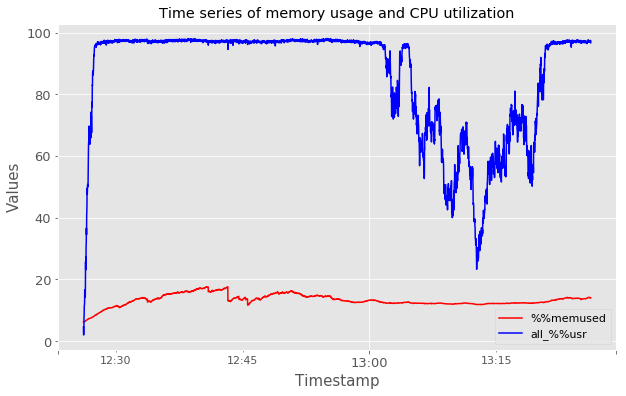

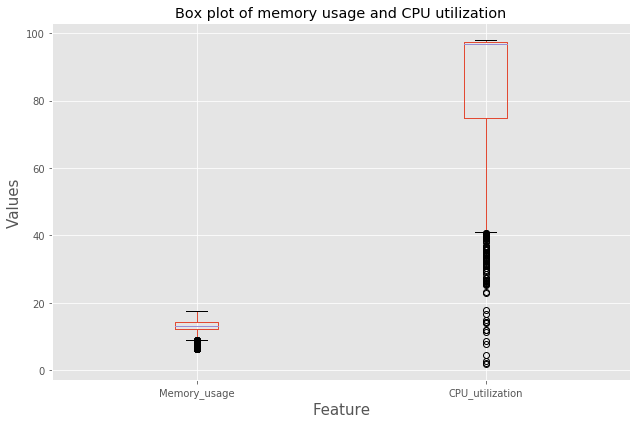

In [8]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt



#read csv file into a pandas DataFrame named seperately
X = pd.read_csv('data/X.csv')

# Convert TimeStamp into date-time format
timeIndex=pd.to_datetime(X['TimeStamp'], unit='s')
X.index=timeIndex



# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Produce the plots for specified features sets
mem = X['%%memused'].plot(color='r')
cpu = X['all_%%usr'].plot(color='b')
axes.grid(True)

# Customizing plot 
font_size = 15
plt.title('Time series of memory usage and CPU utilization')
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('Values', fontsize=font_size)
plt.legend(('%%memused','all_%%usr'), loc = 0, shadow=False, fancybox=False, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)





#Producing the box plot for both features
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
mem_use = X["%%memused"]
cpu_uti = X["all_%%usr"]
data = pd.DataFrame({"Memory_usage":mem_use,
                     "CPU_utilization":cpu_uti})

plt.title('Box plot of memory usage and CPU utilization')

data.boxplot()
plt.ylabel('Values', fontsize = font_size)
plt.xlabel('Feature', fontsize = font_size)
plt.tight_layout()
plt.show()

/Users/fanyuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


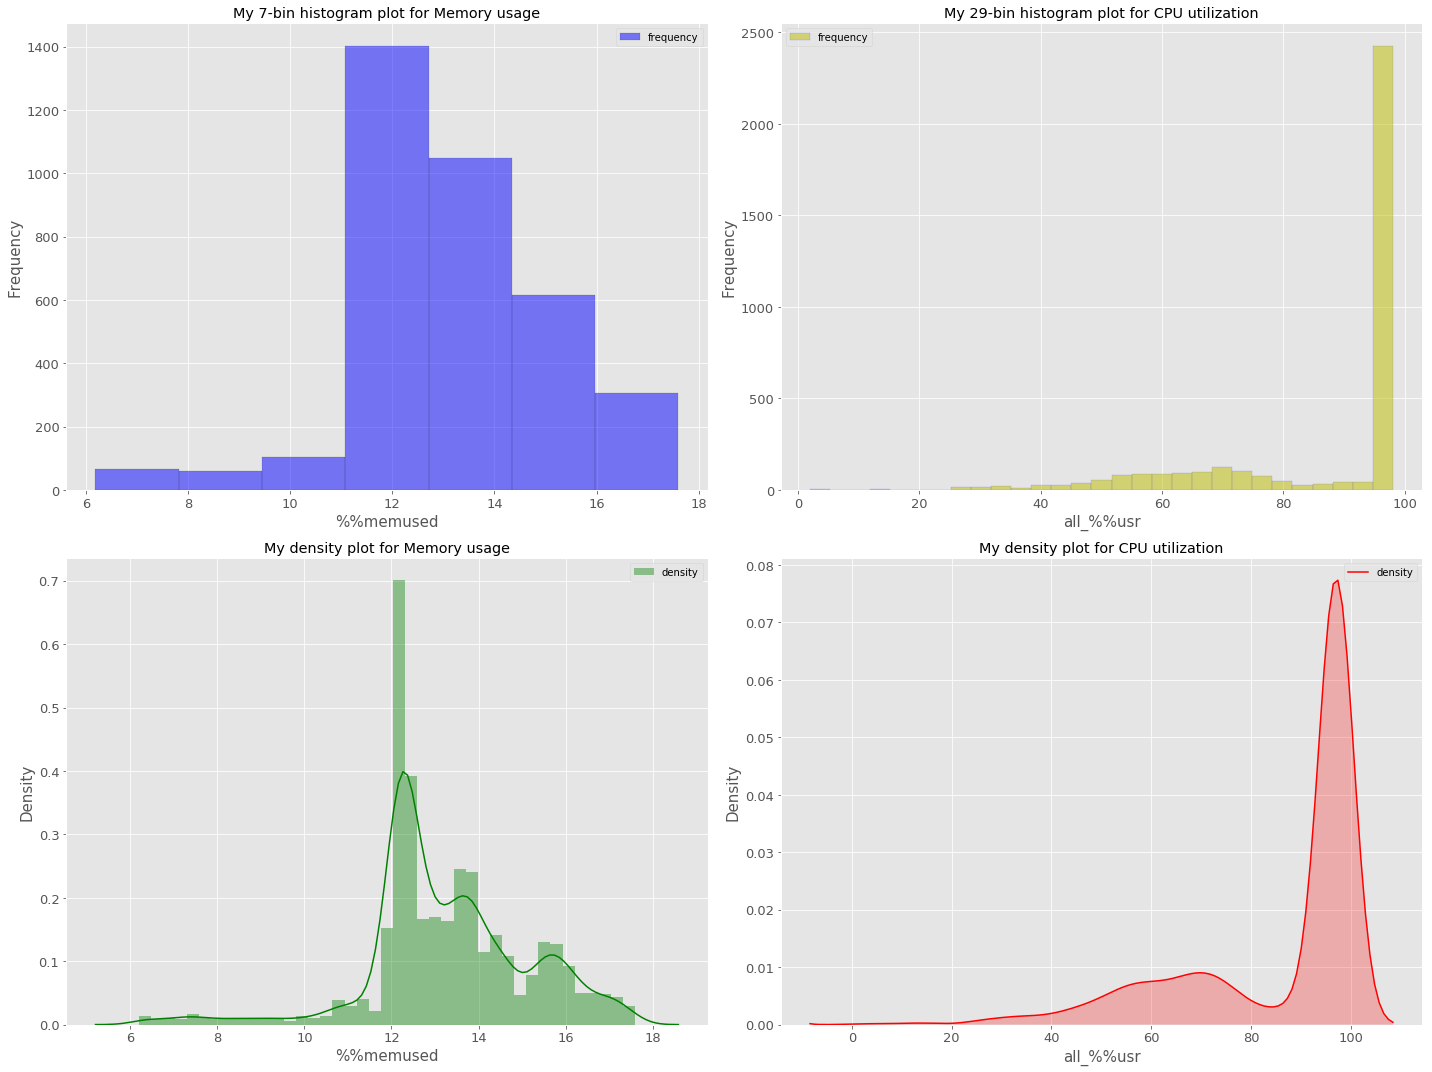

In [9]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file into a pandas DataFrame named seperately
X = pd.read_csv('data/X.csv')

fig = plt.figure(figsize=(20,15))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)
plt.style.use('ggplot')
mem_use = X["%%memused"]
cpu_uti = X["all_%%usr"]

#histogram plot generation with title and color parameters, etc.

#Memory Usage plot
num_bins = int(mem_use.quantile(0.01))
ax0.title.set_text('My %s-bin histogram plot for Memory usage'%num_bins)


ax0.hist(mem_use, bins = num_bins, edgecolor = 'k', color ='b', lw = 0.2, alpha = 0.5, label= 'frequency')


font_size = 15
ax0.set_xlabel('%%memused', fontsize=font_size)
ax0.set_ylabel('Frequency', fontsize=font_size)
ax0.legend()
ax0.tick_params(axis='both', which='major', labelsize=font_size-2)
ax0.tick_params(axis='both', which='minor', labelsize=font_size-4)


#density plot generation using seaborn displot
ax1.title.set_text('My density plot for Memory usage')


ax1 = sns.distplot(mem_use, color ='g', label= 'density', ax=ax1)



ax1.set_xlabel('%%memused', fontsize=font_size)
ax1.set_ylabel('Density', fontsize=font_size)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=font_size-2)
ax1.tick_params(axis='both', which='minor', labelsize=font_size-4)

#CPU utilization plot
#histogram plot generation with title and color parameters, etc.
num_bins_1 = int(cpu_uti.quantile(0.01))
ax2.title.set_text('My %s-bin histogram plot for CPU utilization'%num_bins_1)


ax2.hist(cpu_uti, bins = num_bins_1, edgecolor = 'b', color ='y', lw = 0.2, alpha = 0.5, label= 'frequency')


ax2.set_xlabel('all_%%usr', fontsize=font_size)
ax2.set_ylabel('Frequency', fontsize=font_size)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=font_size-2)
ax2.tick_params(axis='both', which='minor', labelsize=font_size-4)


#density plot generation using seaborn kdeplot
ax3.title.set_text('My density plot for CPU utilization')

ax3 = sns.kdeplot(cpu_uti, color ='r',shade = True, label= 'density',ax=ax3)



ax3.set_xlabel('all_%%usr', fontsize=font_size)
ax3.set_ylabel('Density', fontsize=font_size)
ax3.legend()
ax3.tick_params(axis='both', which='major', labelsize=font_size-2)
ax3.tick_params(axis='both', which='minor', labelsize=font_size-4)


plt.tight_layout()
plt.show()